<a href="https://colab.research.google.com/github/Saint7337/Colab-Project-/blob/main/MAGIC_CLOUD_CHAMBER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

In [2]:
cols = ("fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "Class")
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist Class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df["Class"] = (df["Class"] == "g").astype(int)

In [4]:
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  Class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["Class"]==1][label], color = "blue", label = "gamma", alpha = 0.7, density = True)
  plt.hist(df[df["Class"]==0][label], color = "red", label = "hadron", alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, Validation and Test Datasets

In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [7]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  Y = dataframe[dataframe.columns[-1]].values.reshape(-1, 1)


  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X,Y = ros.fit_resample(X,Y)


  data = np.hstack((X, np.reshape(Y, (-1,1))))

  return data, X,Y

In [8]:
train, X_train, Y_train = scale_dataset(train, oversample=True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample=False)
test, X_test, Y_test = scale_dataset(test, oversample=False)

In [9]:
train = pd.DataFrame(train)

In [10]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14710 entries, 0 to 14709
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       14710 non-null  float64
 1   1       14710 non-null  float64
 2   2       14710 non-null  float64
 3   3       14710 non-null  float64
 4   4       14710 non-null  float64
 5   5       14710 non-null  float64
 6   6       14710 non-null  float64
 7   7       14710 non-null  float64
 8   8       14710 non-null  float64
 9   9       14710 non-null  float64
 10  10      14710 non-null  float64
dtypes: float64(11)
memory usage: 1.2 MB
None


In [11]:
train.head()

0         1         2         3         4         5         6   \
0  1.104810  0.629937  2.574663 -1.464167 -1.433881 -0.653174  1.181706   
1 -0.372211 -0.078826  0.060377 -0.553429 -0.629805  0.420743  0.425860   
2  0.331367  1.529870  1.125605 -1.507561 -1.427507  0.842519 -0.674260   
3 -0.644802 -0.280693 -0.416919  0.258985  0.207965  0.236665 -0.027626   
4 -0.620395 -0.639850 -0.345706  0.661072  0.564927  0.104433  0.193610   

         7         8         9    10  
0 -0.366894 -0.988539  1.396513  1.0  
1 -0.389335 -0.436985  0.261658  1.0  
2 -1.342012 -0.526060 -0.048149  1.0  
3 -0.488394  1.057804 -2.031467  1.0  
4  0.309470  0.255163  0.343223  0.0

# K Nearest Neighbours

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
Y_pred = knn_model.predict(X_test)

In [15]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1309
           1       0.83      0.89      0.86      2495

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.78      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, Y_train)

In [18]:
Y_pred = nb_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.41      0.52      1309
           1       0.75      0.90      0.82      2495

    accuracy                           0.74      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.74      0.71      3804



# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, Y_train)

In [21]:
Y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1309
           1       0.84      0.81      0.83      2495

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# Support Vector Machines

In [22]:
from sklearn.svm import SVC

In [23]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, Y_train)

In [24]:
Y_pred = svm_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1309
           1       0.89      0.91      0.90      2495

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.87      0.86      3804



# Neural Network

In [25]:
import tensorflow as tf

In [35]:
def train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation = 'relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy', metrics = ['accuracy'])
  history = nn_model.fit(
    X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0
)
  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


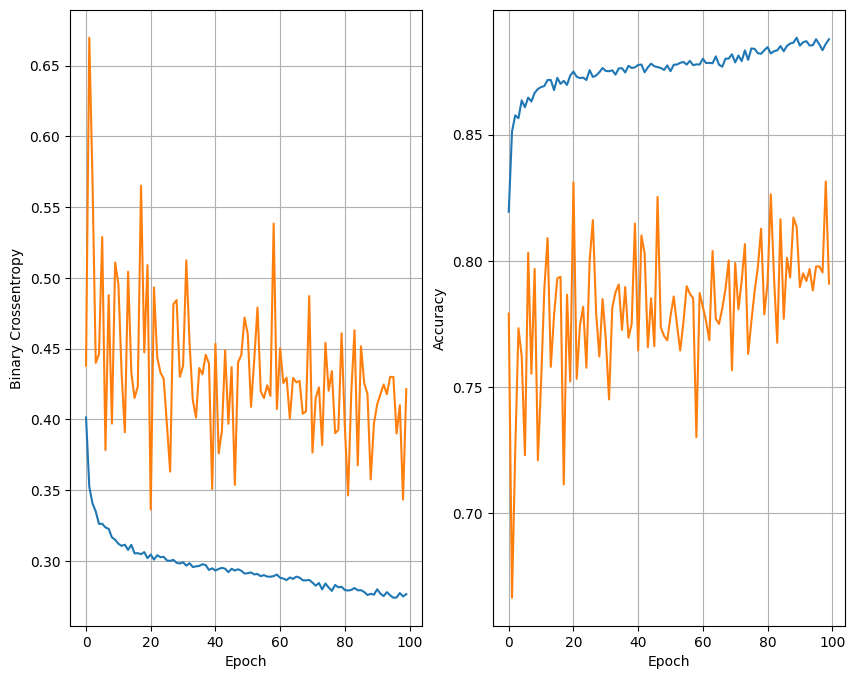

119/119 [==============================] - 1s 2ms/step - loss: 0.3044 - accuracy: 0.8720
16 nodes, dropout 0, lr 0.01, batch size 64


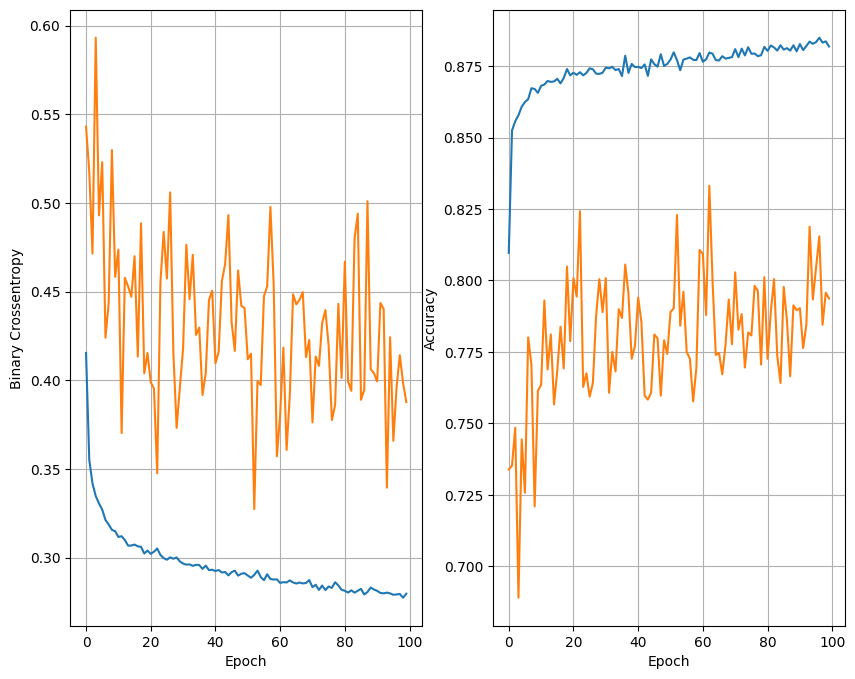

119/119 [==============================] - 1s 3ms/step - loss: 0.3232 - accuracy: 0.8659
16 nodes, dropout 0, lr 0.01, batch size 128


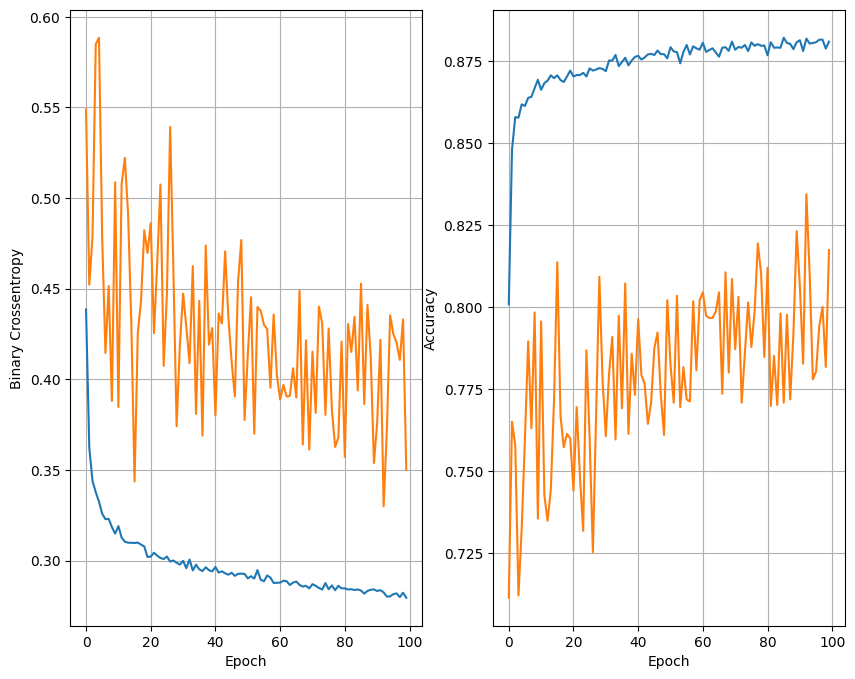

119/119 [==============================] - 1s 2ms/step - loss: 0.3095 - accuracy: 0.8683
16 nodes, dropout 0, lr 0.005, batch size 32


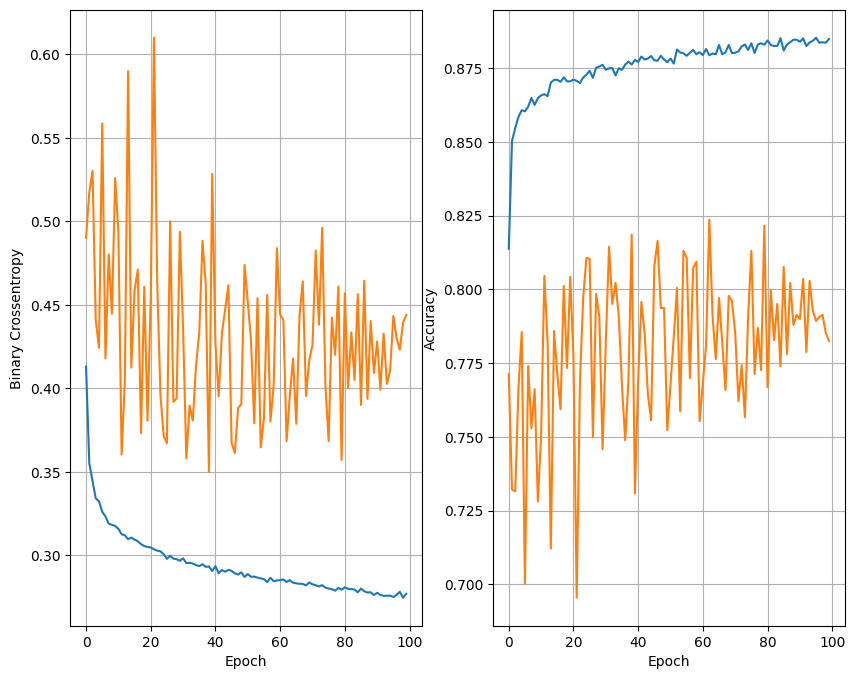

119/119 [==============================] - 1s 2ms/step - loss: 0.3075 - accuracy: 0.8759
16 nodes, dropout 0, lr 0.005, batch size 64


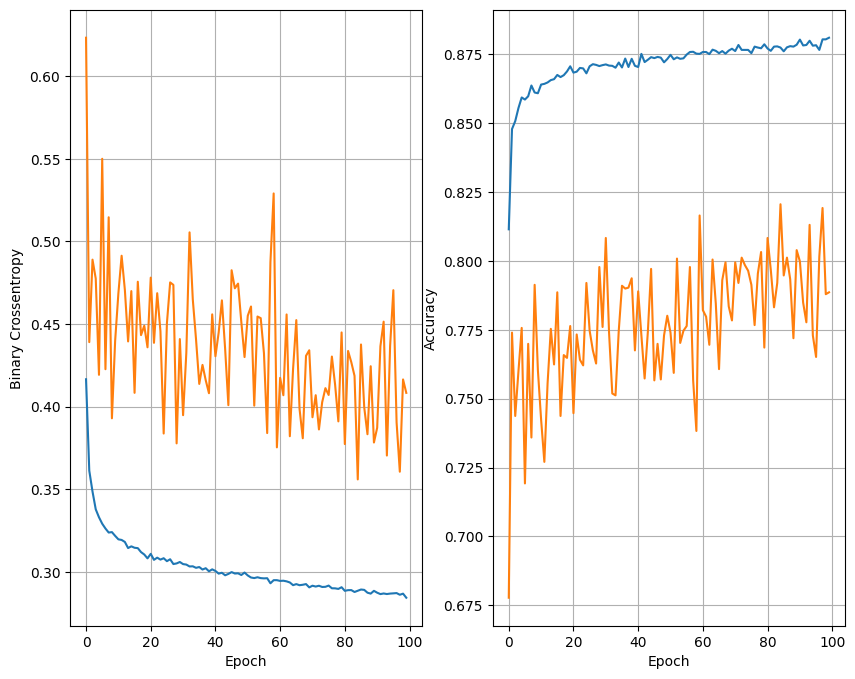

119/119 [==============================] - 1s 2ms/step - loss: 0.3189 - accuracy: 0.8649
16 nodes, dropout 0, lr 0.005, batch size 128


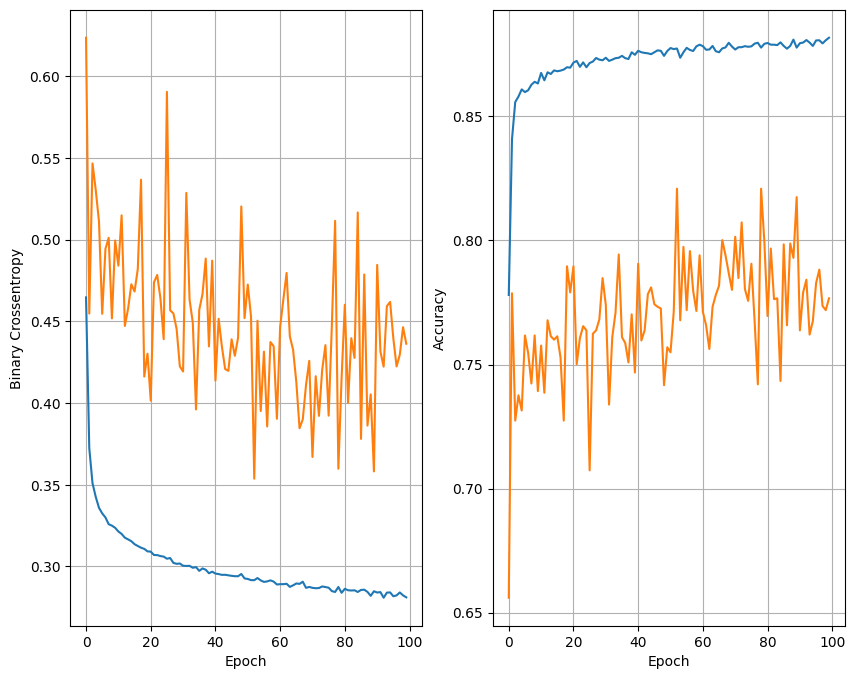

119/119 [==============================] - 1s 2ms/step - loss: 0.3081 - accuracy: 0.8733
16 nodes, dropout 0, lr 0.001, batch size 32


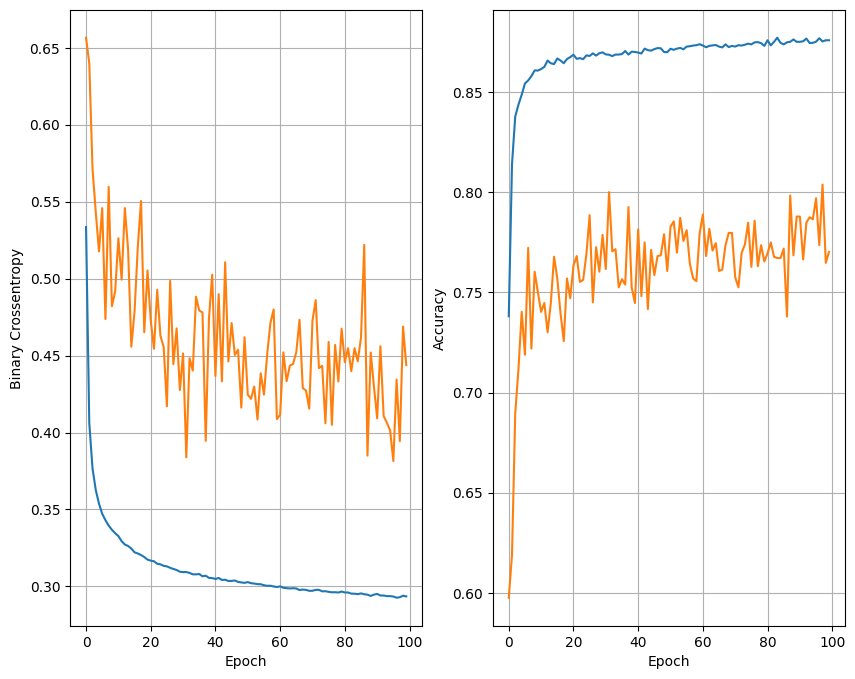

119/119 [==============================] - 1s 2ms/step - loss: 0.3054 - accuracy: 0.8749
16 nodes, dropout 0, lr 0.001, batch size 64


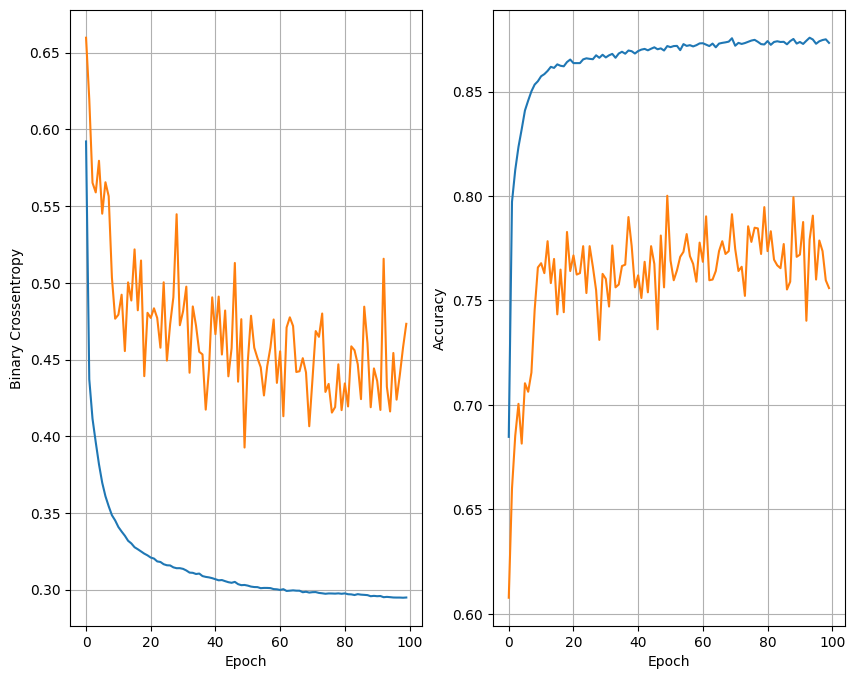

119/119 [==============================] - 1s 2ms/step - loss: 0.3106 - accuracy: 0.8675
16 nodes, dropout 0, lr 0.001, batch size 128


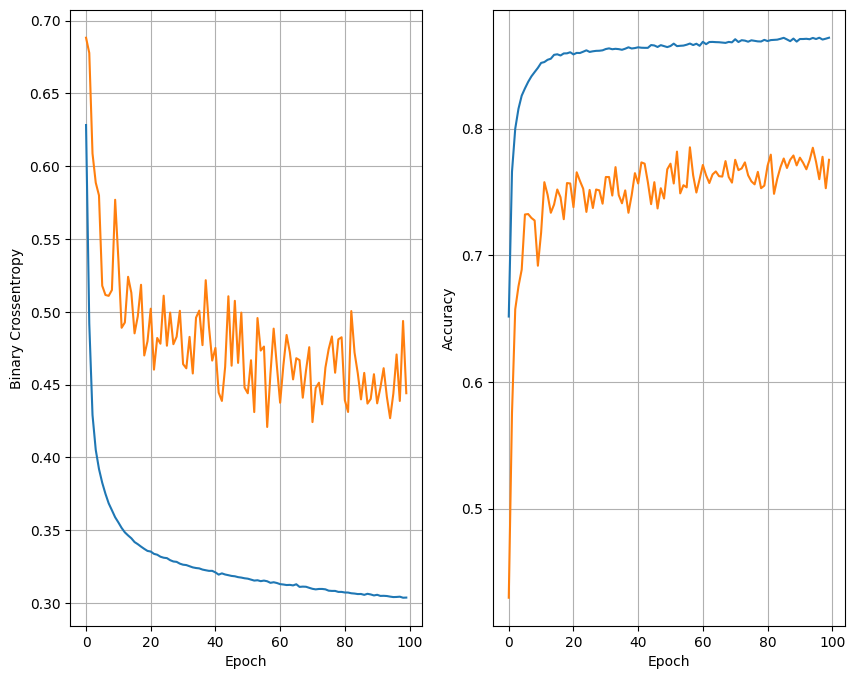

119/119 [==============================] - 1s 2ms/step - loss: 0.3152 - accuracy: 0.8678
16 nodes, dropout 0.2, lr 0.01, batch size 32


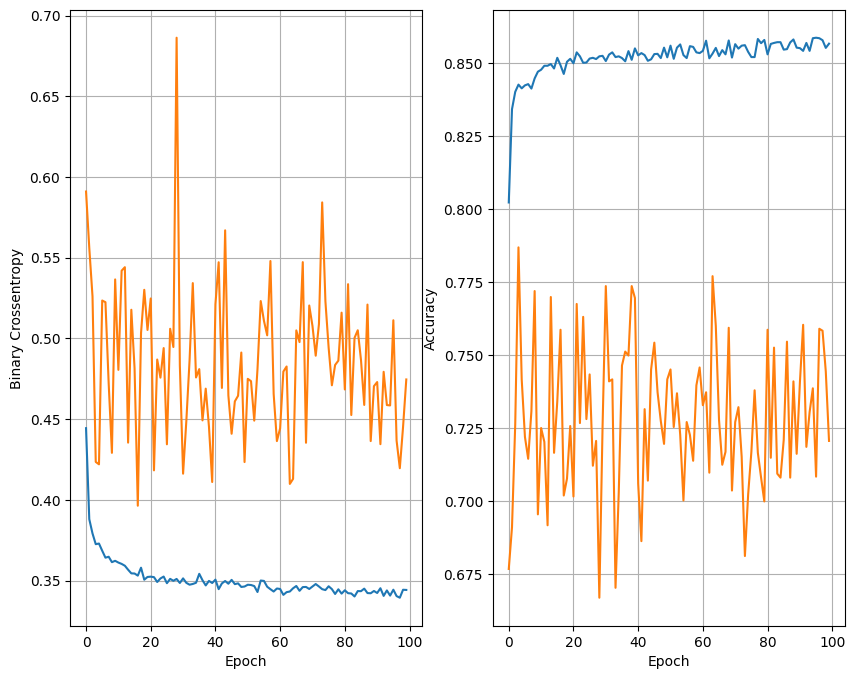

119/119 [==============================] - 1s 2ms/step - loss: 0.3147 - accuracy: 0.8665
16 nodes, dropout 0.2, lr 0.01, batch size 64


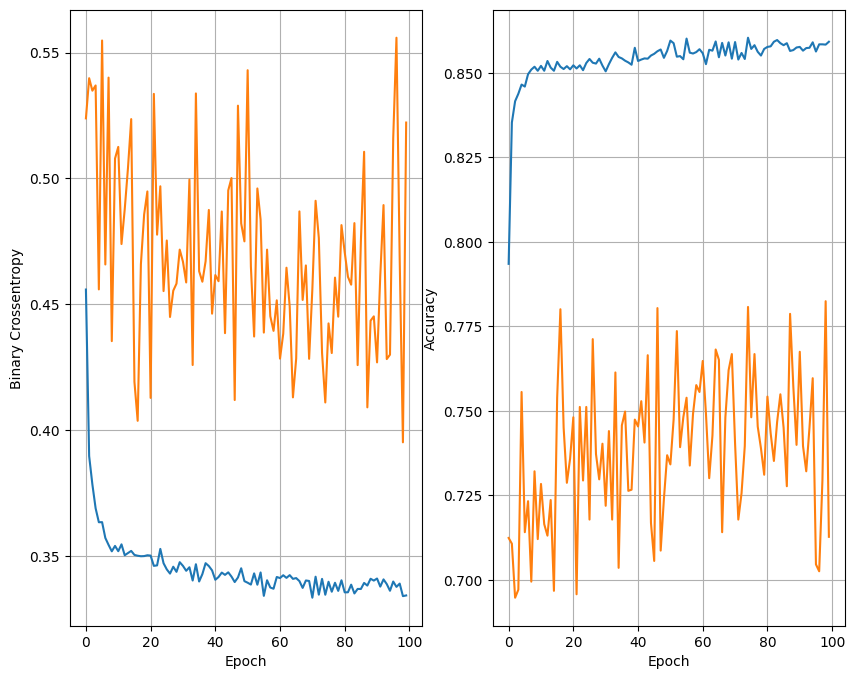

119/119 [==============================] - 1s 2ms/step - loss: 0.3143 - accuracy: 0.8641
16 nodes, dropout 0.2, lr 0.01, batch size 128


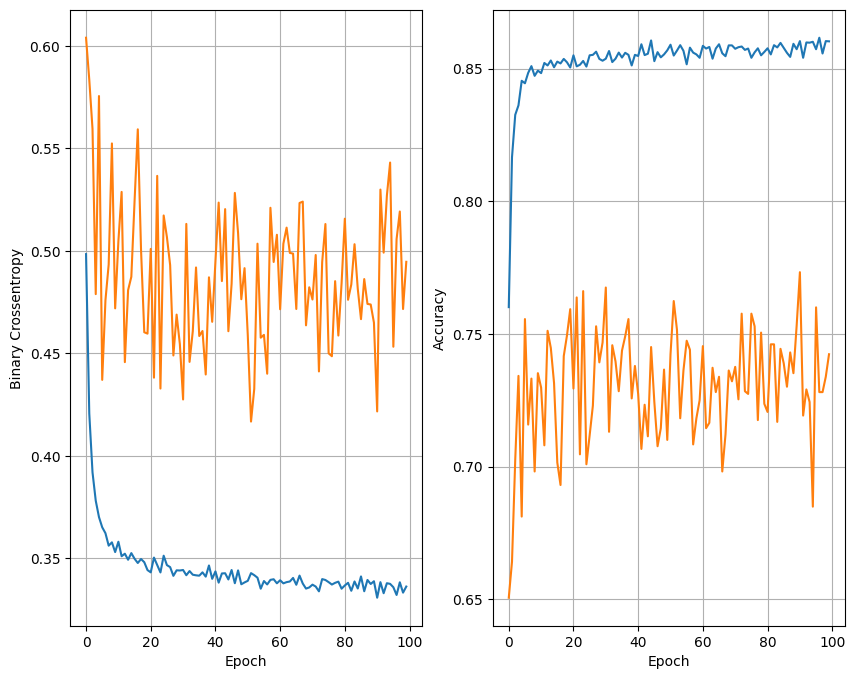

119/119 [==============================] - 1s 2ms/step - loss: 0.3114 - accuracy: 0.8717
16 nodes, dropout 0.2, lr 0.005, batch size 32


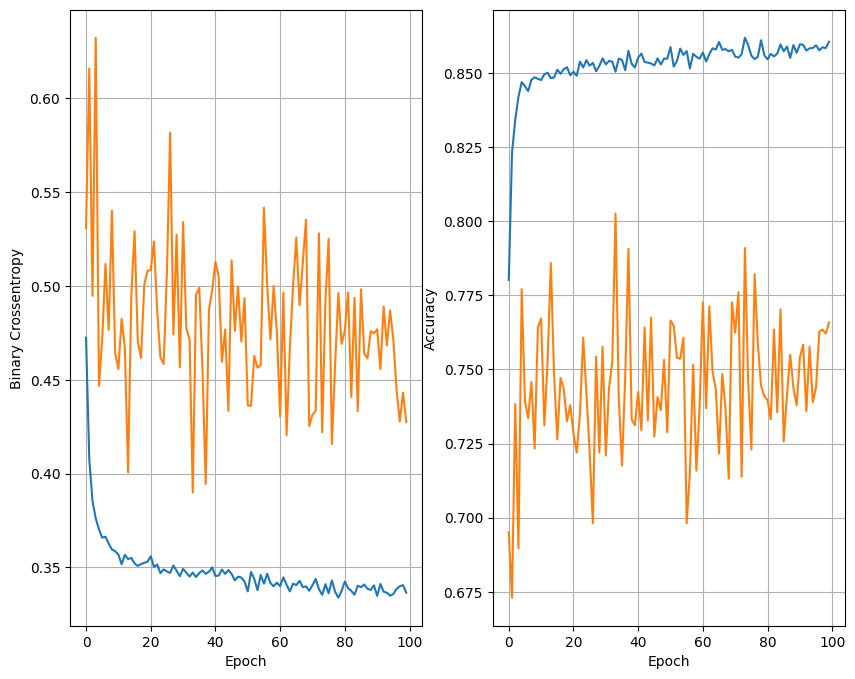

119/119 [==============================] - 1s 2ms/step - loss: 0.3205 - accuracy: 0.8688
16 nodes, dropout 0.2, lr 0.005, batch size 64


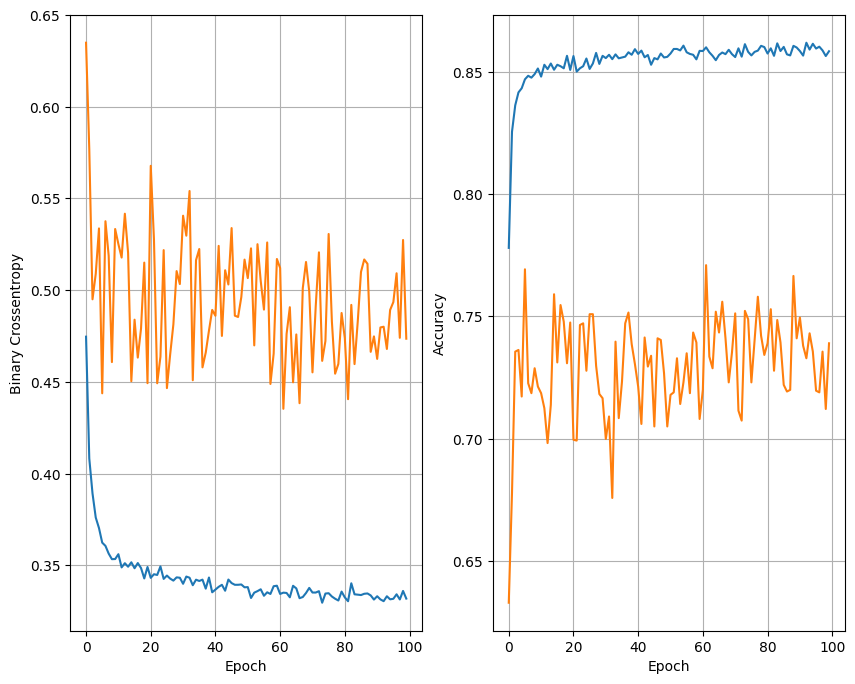

119/119 [==============================] - 1s 2ms/step - loss: 0.3189 - accuracy: 0.8633
16 nodes, dropout 0.2, lr 0.005, batch size 128


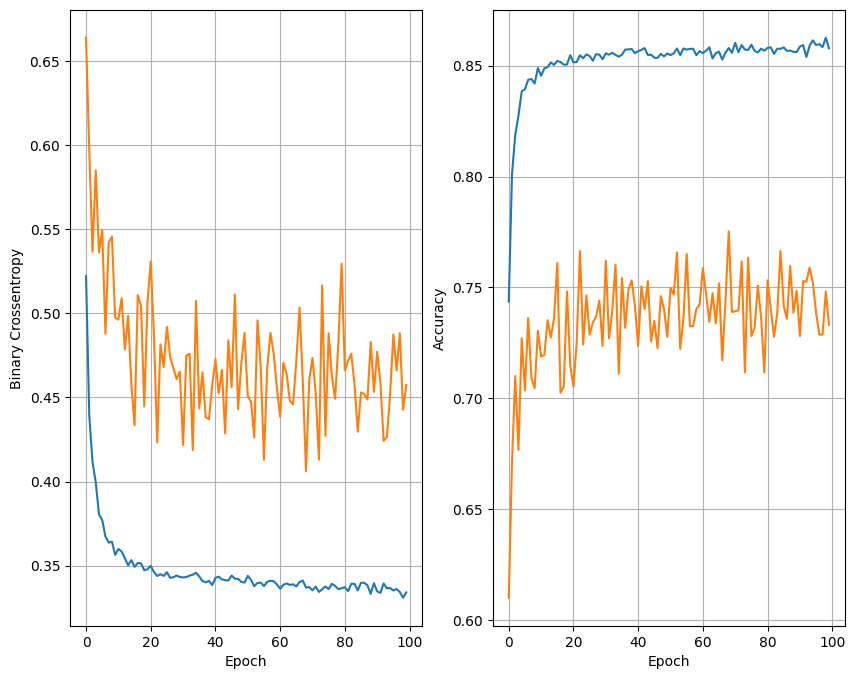

119/119 [==============================] - 1s 2ms/step - loss: 0.3173 - accuracy: 0.8717
16 nodes, dropout 0.2, lr 0.001, batch size 32


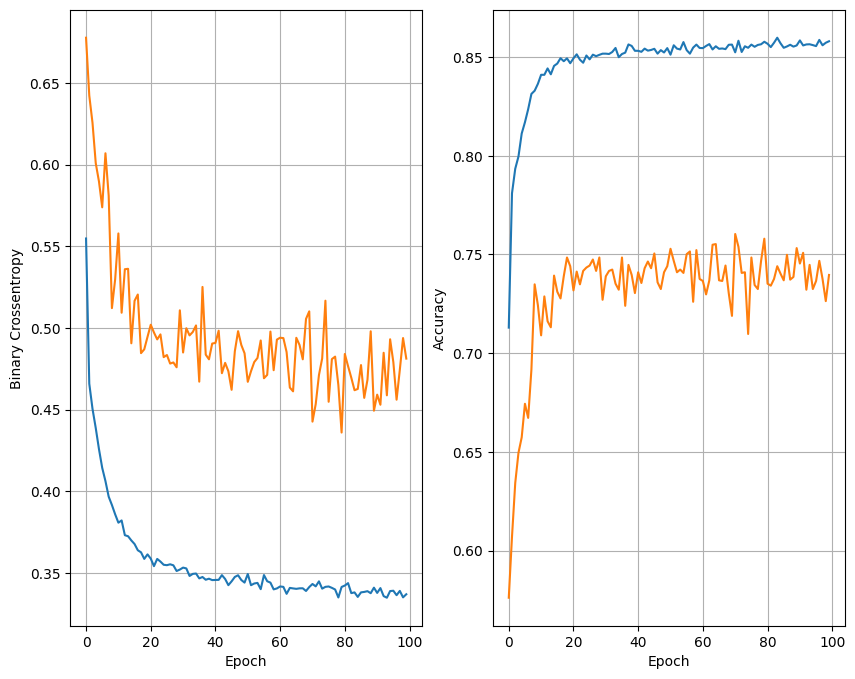

119/119 [==============================] - 1s 3ms/step - loss: 0.3178 - accuracy: 0.8665
16 nodes, dropout 0.2, lr 0.001, batch size 64


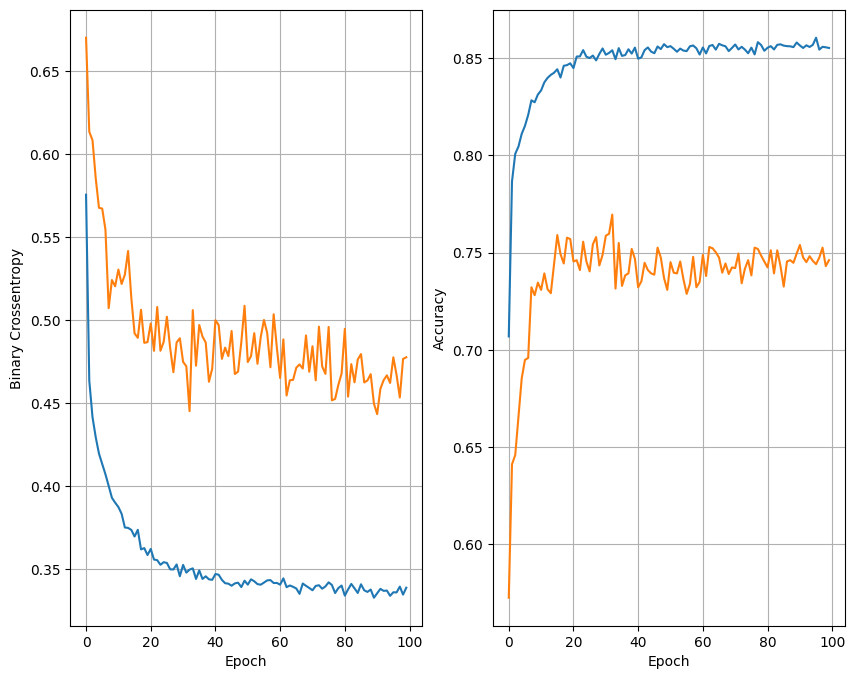

119/119 [==============================] - 1s 2ms/step - loss: 0.3194 - accuracy: 0.8659
16 nodes, dropout 0.2, lr 0.001, batch size 128


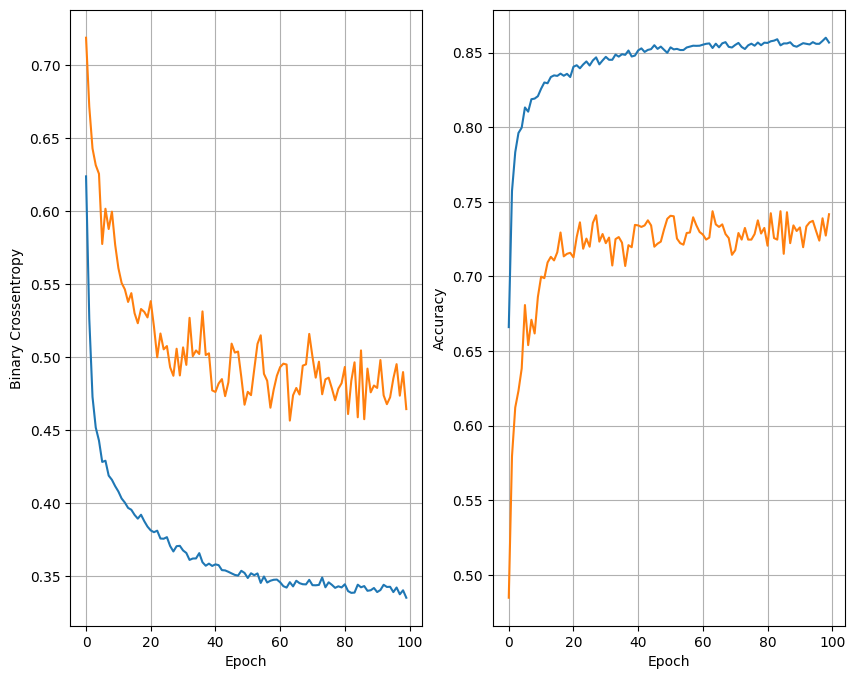

119/119 [==============================] - 1s 2ms/step - loss: 0.3164 - accuracy: 0.8680
32 nodes, dropout 0, lr 0.01, batch size 32


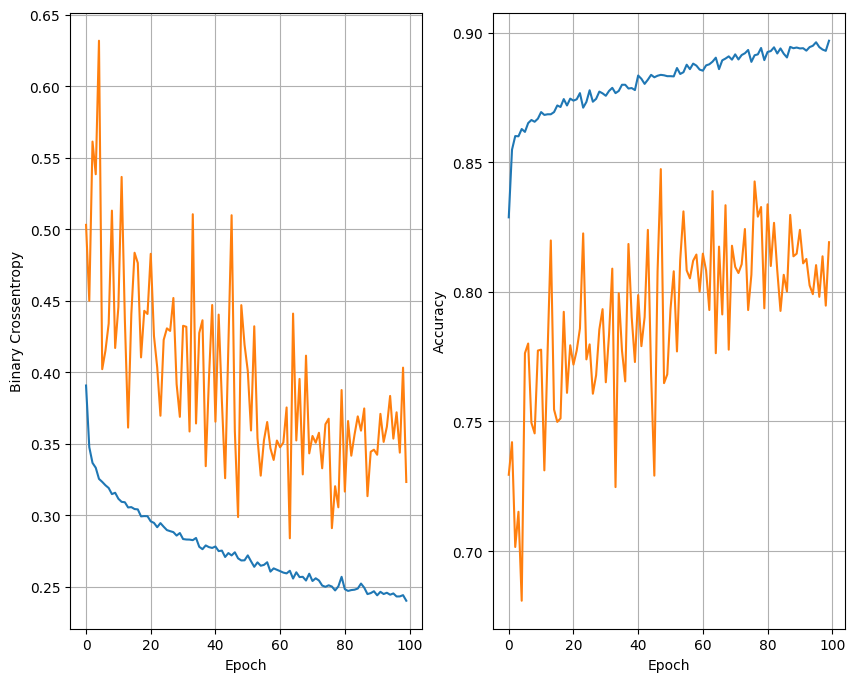

119/119 [==============================] - 1s 2ms/step - loss: 0.3672 - accuracy: 0.8583
32 nodes, dropout 0, lr 0.01, batch size 64


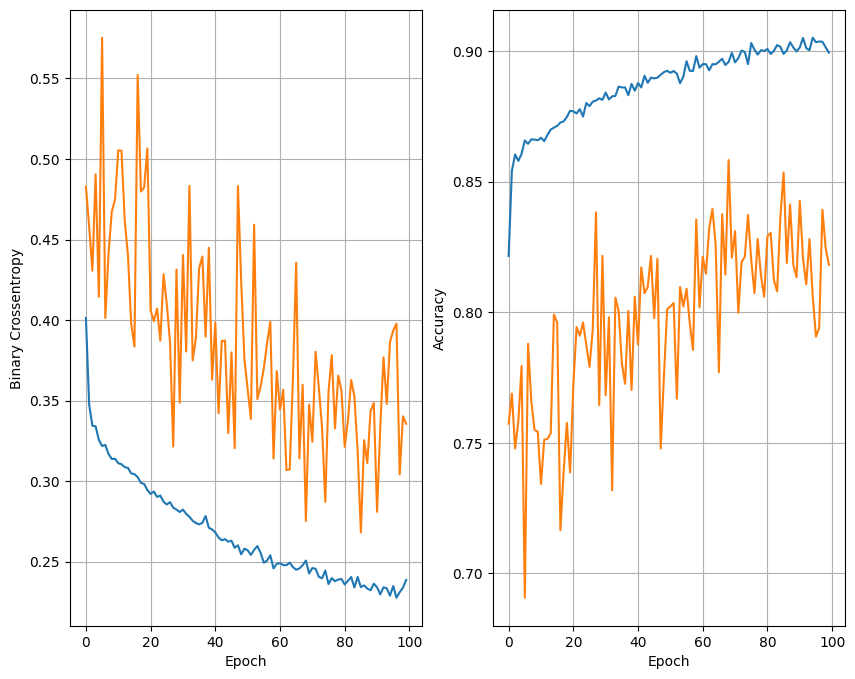

119/119 [==============================] - 1s 2ms/step - loss: 0.3676 - accuracy: 0.8649
32 nodes, dropout 0, lr 0.01, batch size 128


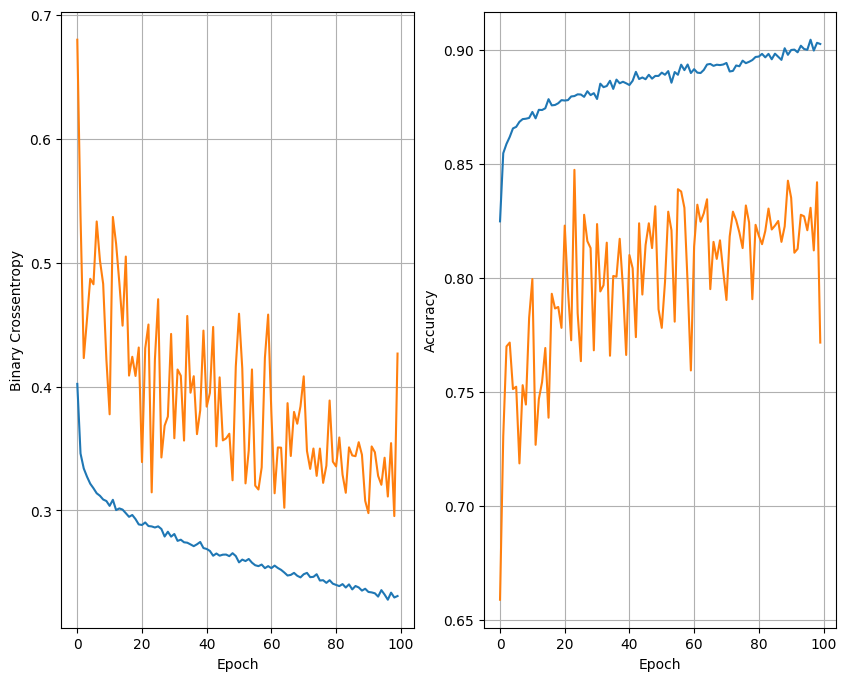

119/119 [==============================] - 1s 2ms/step - loss: 0.3672 - accuracy: 0.8612
32 nodes, dropout 0, lr 0.005, batch size 32


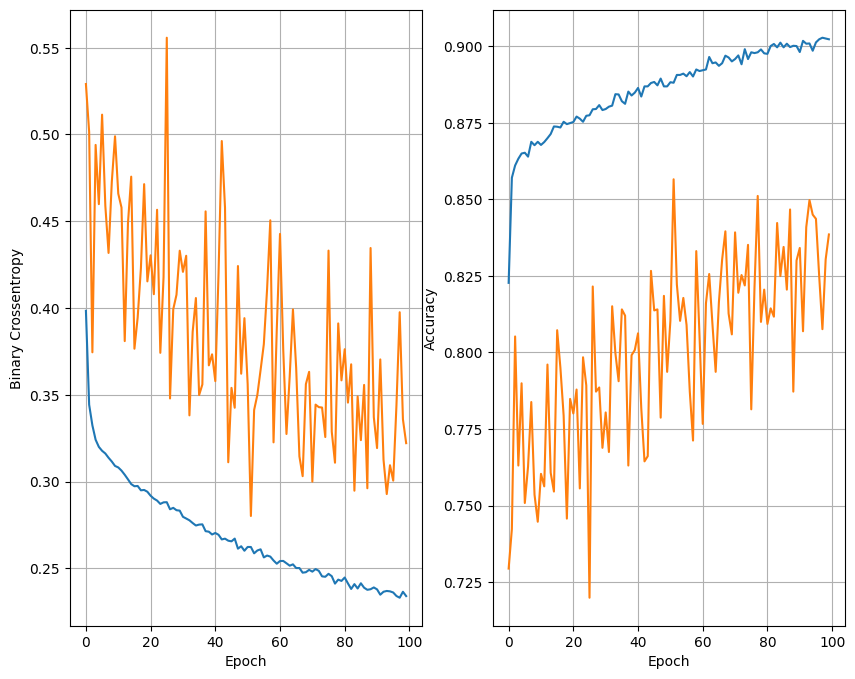

119/119 [==============================] - 1s 2ms/step - loss: 0.3586 - accuracy: 0.8649
32 nodes, dropout 0, lr 0.005, batch size 64


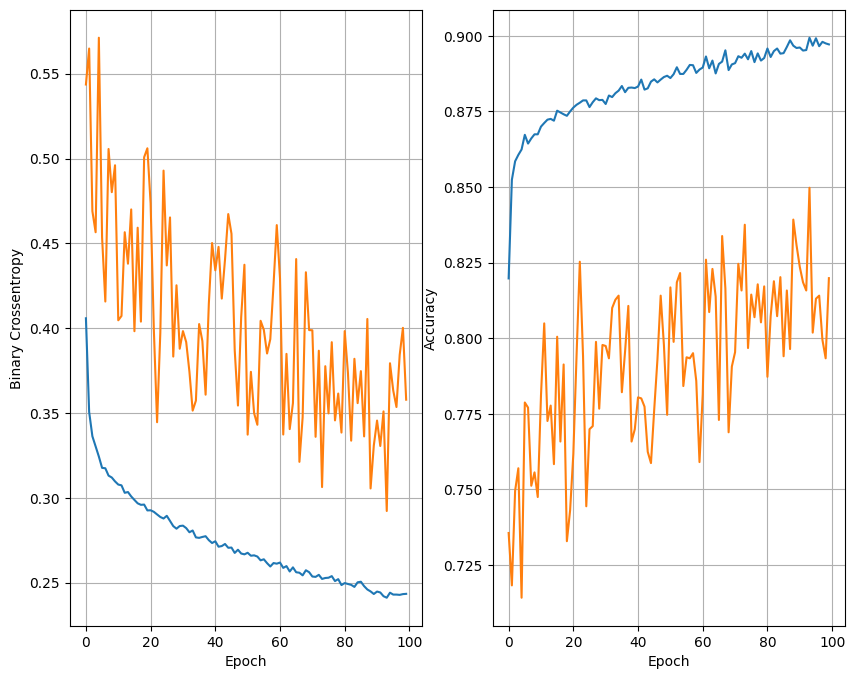

119/119 [==============================] - 1s 2ms/step - loss: 0.3452 - accuracy: 0.8675
32 nodes, dropout 0, lr 0.005, batch size 128


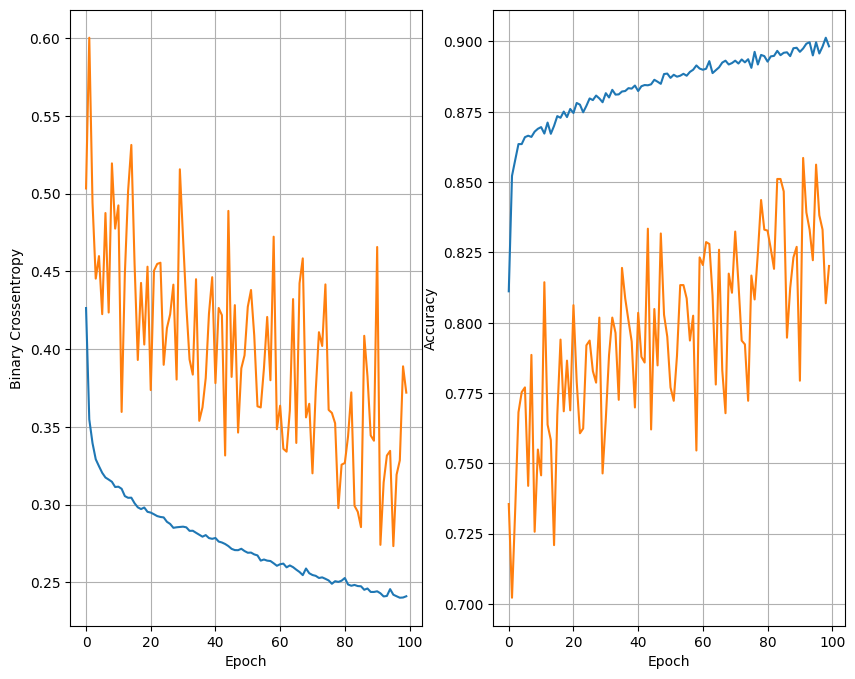

119/119 [==============================] - 1s 2ms/step - loss: 0.3269 - accuracy: 0.8715
32 nodes, dropout 0, lr 0.001, batch size 32


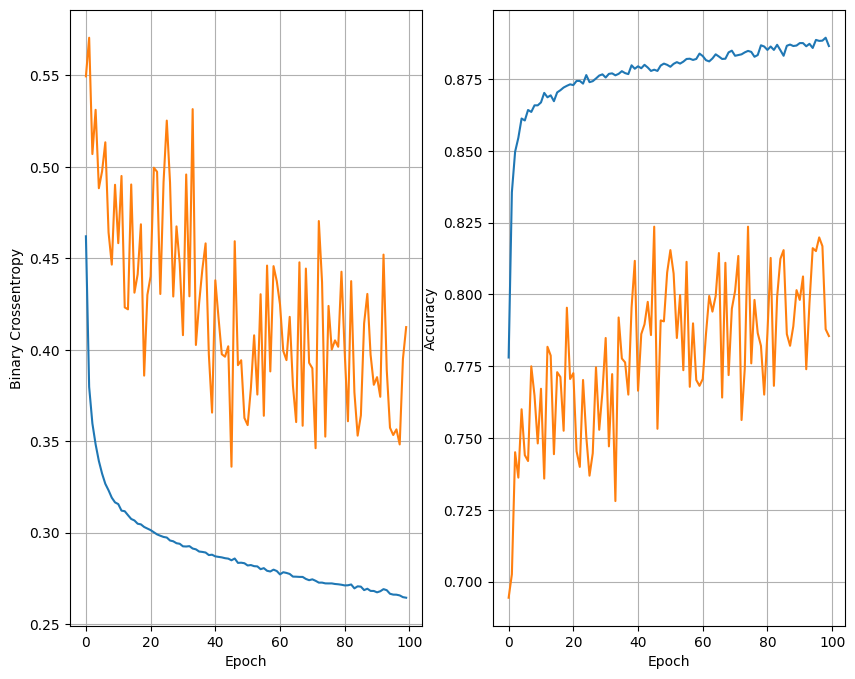

119/119 [==============================] - 1s 2ms/step - loss: 0.3130 - accuracy: 0.8699
32 nodes, dropout 0, lr 0.001, batch size 64


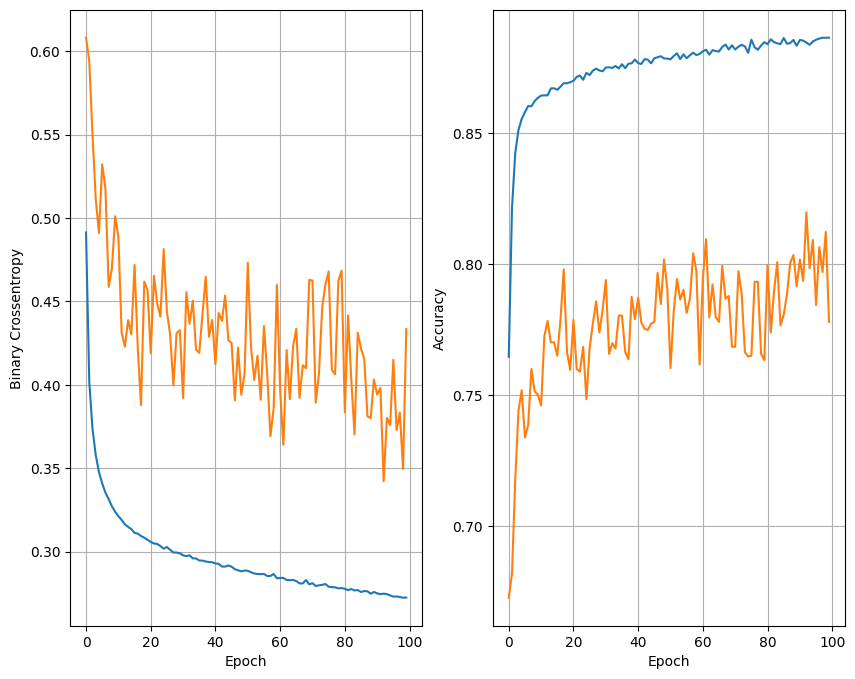

119/119 [==============================] - 1s 4ms/step - loss: 0.3066 - accuracy: 0.8715
32 nodes, dropout 0, lr 0.001, batch size 128


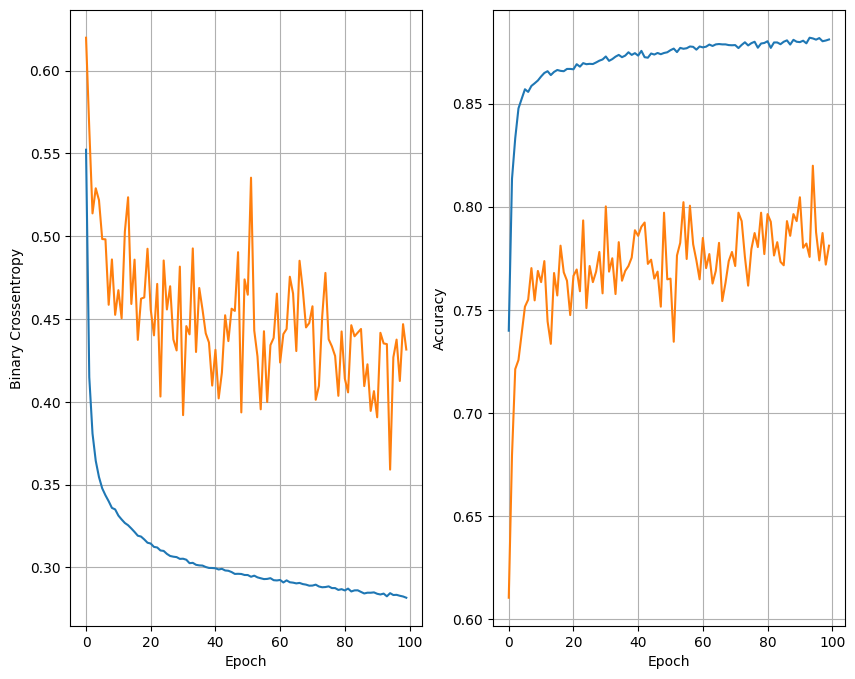

119/119 [==============================] - 1s 3ms/step - loss: 0.3076 - accuracy: 0.8736
32 nodes, dropout 0.2, lr 0.01, batch size 32


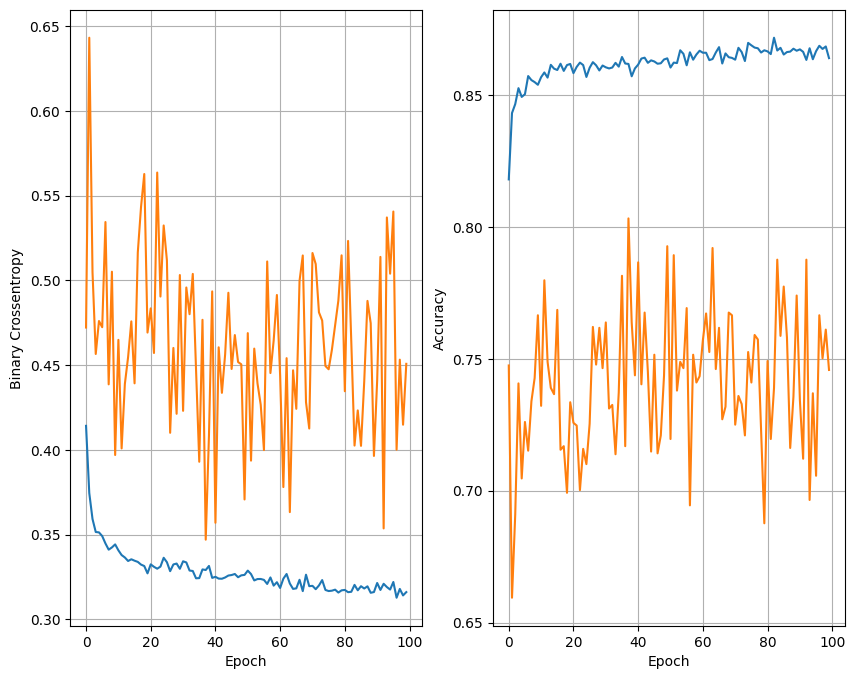

119/119 [==============================] - 1s 2ms/step - loss: 0.3115 - accuracy: 0.8725
32 nodes, dropout 0.2, lr 0.01, batch size 64


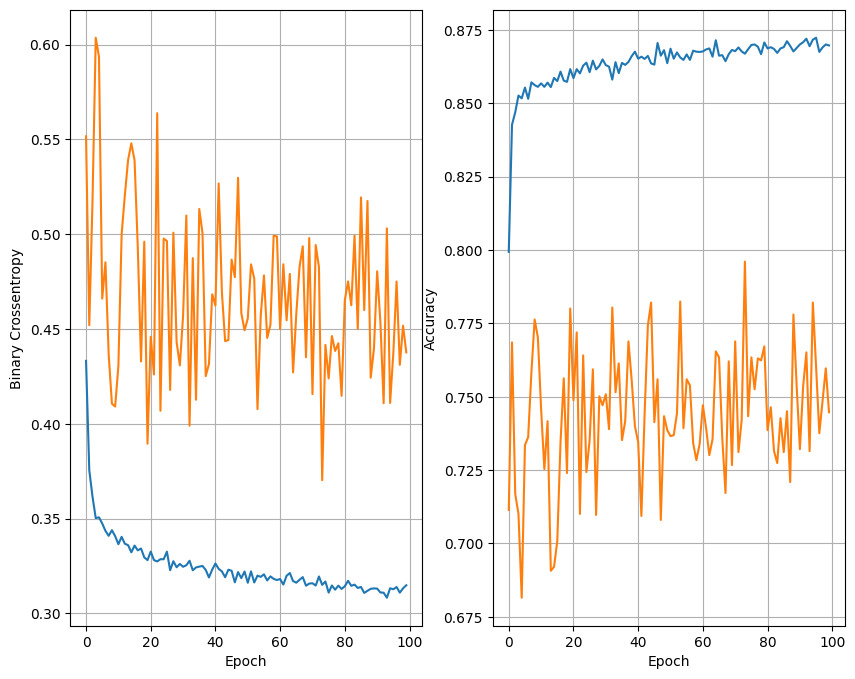

119/119 [==============================] - 1s 2ms/step - loss: 0.3109 - accuracy: 0.8686
32 nodes, dropout 0.2, lr 0.01, batch size 128


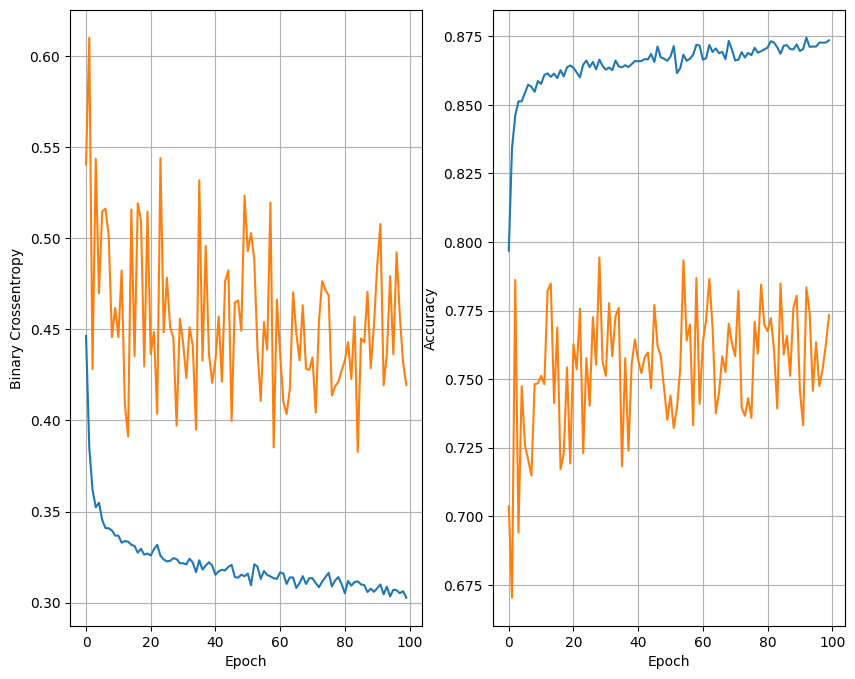

119/119 [==============================] - 1s 2ms/step - loss: 0.3045 - accuracy: 0.8722
32 nodes, dropout 0.2, lr 0.005, batch size 32


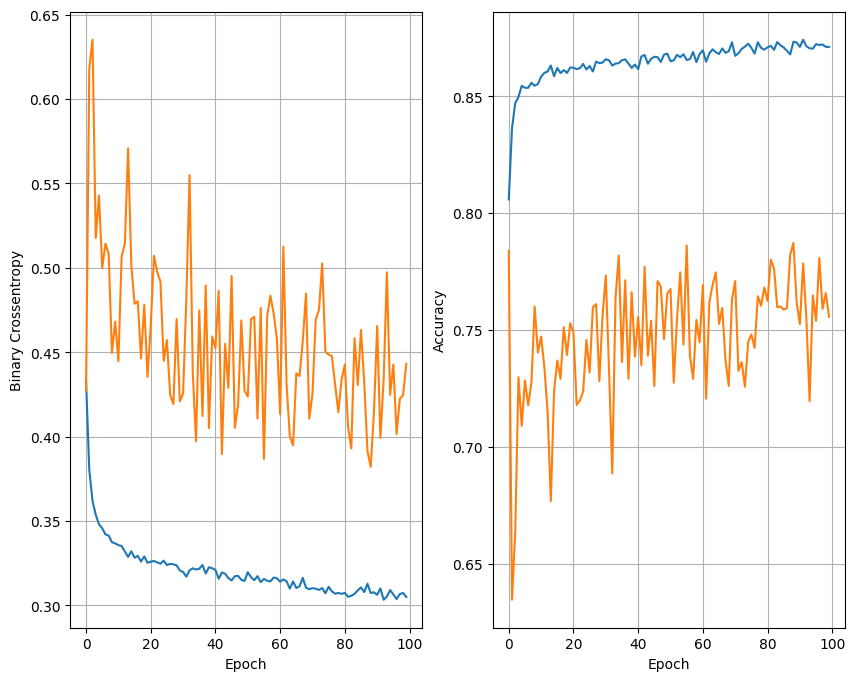

119/119 [==============================] - 1s 3ms/step - loss: 0.3029 - accuracy: 0.8733
32 nodes, dropout 0.2, lr 0.005, batch size 64


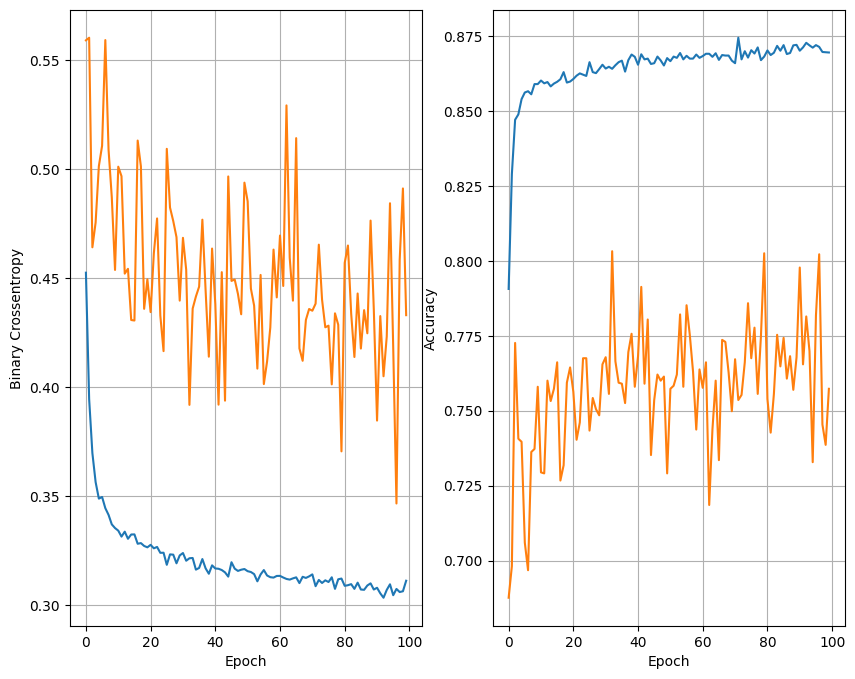

119/119 [==============================] - 1s 2ms/step - loss: 0.3023 - accuracy: 0.8751
32 nodes, dropout 0.2, lr 0.005, batch size 128


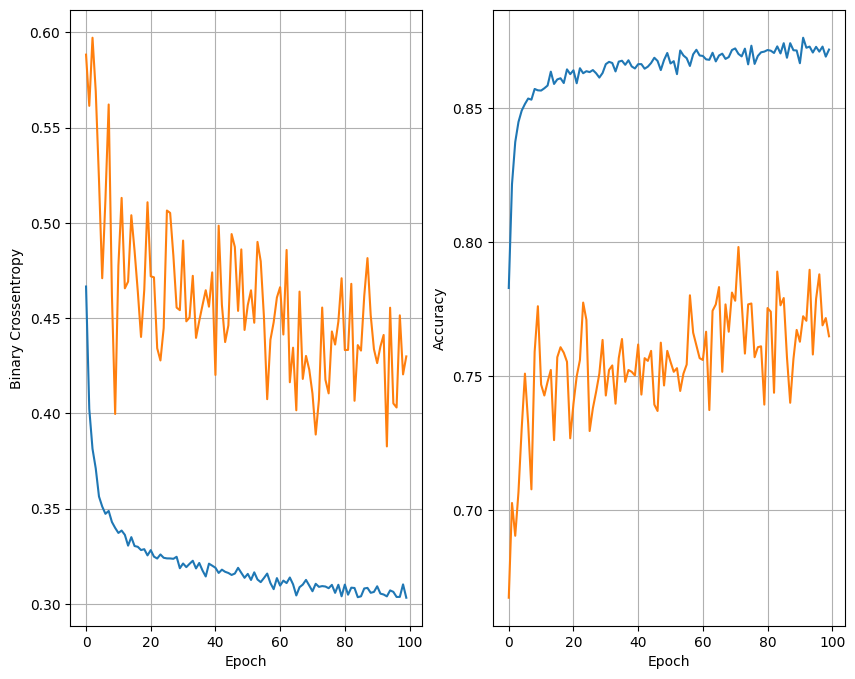

119/119 [==============================] - 1s 2ms/step - loss: 0.2995 - accuracy: 0.8728
32 nodes, dropout 0.2, lr 0.001, batch size 32


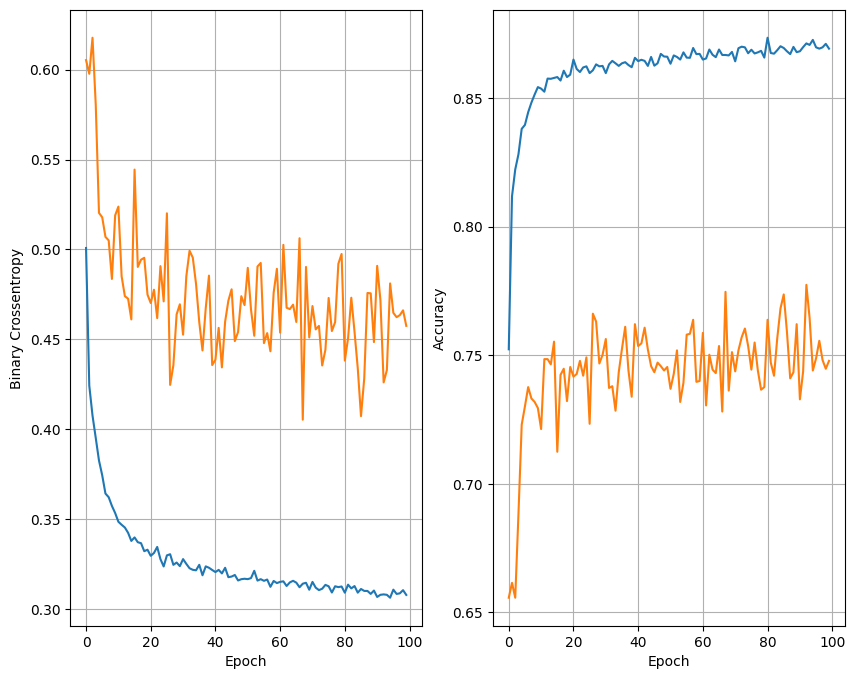

119/119 [==============================] - 1s 2ms/step - loss: 0.3006 - accuracy: 0.8738
32 nodes, dropout 0.2, lr 0.001, batch size 64


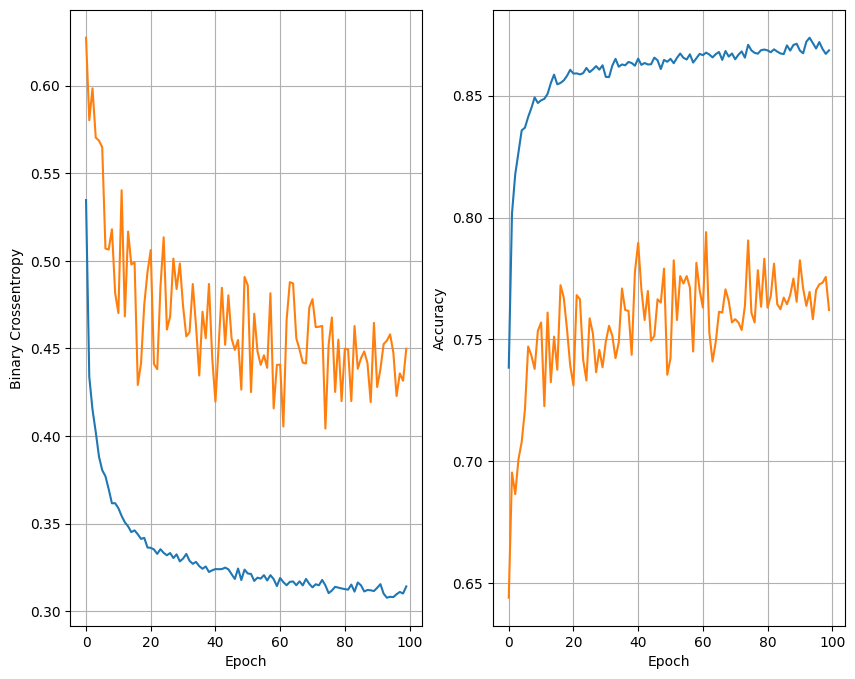

119/119 [==============================] - 1s 3ms/step - loss: 0.3046 - accuracy: 0.8709
32 nodes, dropout 0.2, lr 0.001, batch size 128


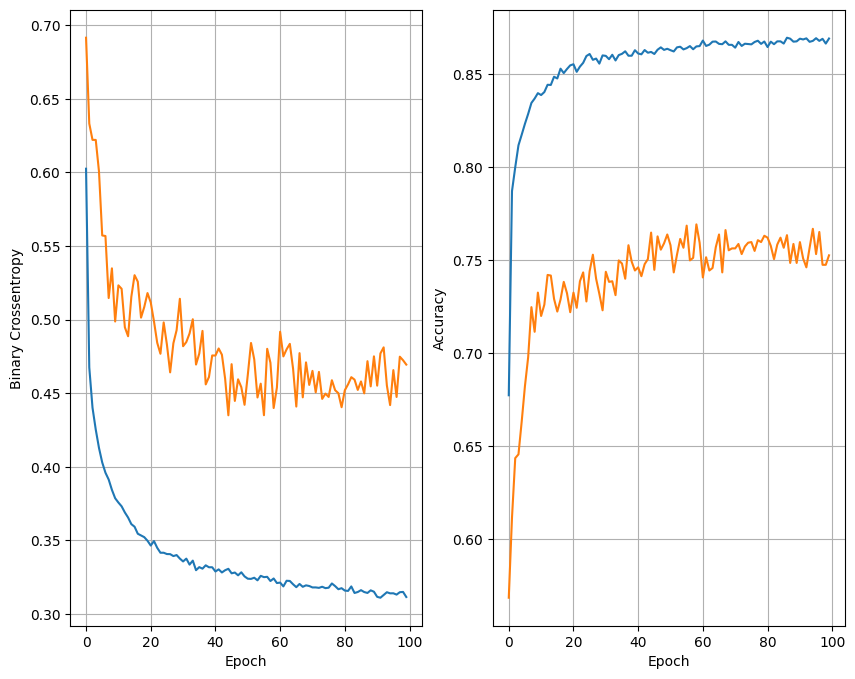

119/119 [==============================] - 1s 2ms/step - loss: 0.3024 - accuracy: 0.8715
64 nodes, dropout 0, lr 0.01, batch size 32


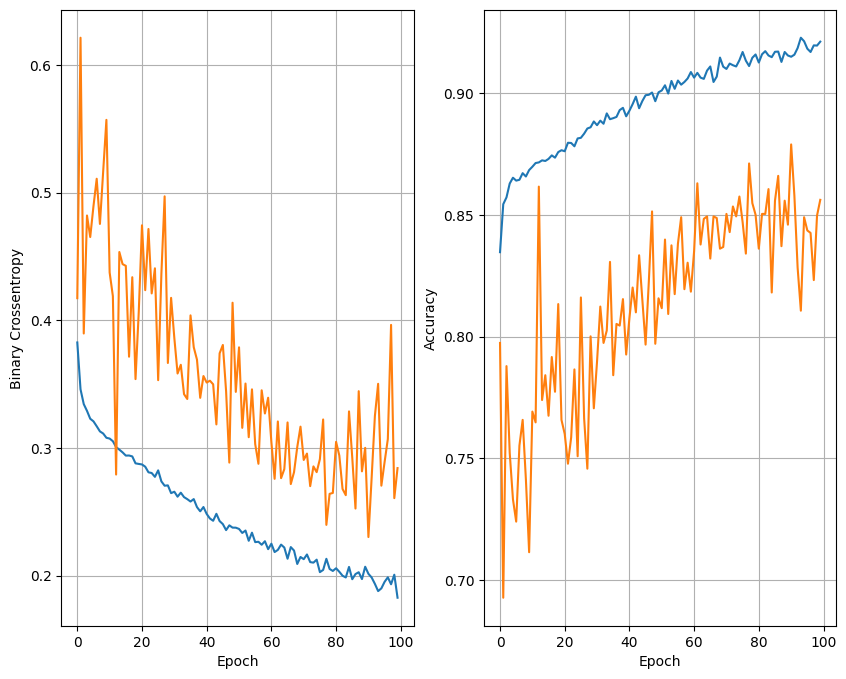

119/119 [==============================] - 1s 3ms/step - loss: 0.4786 - accuracy: 0.8628
64 nodes, dropout 0, lr 0.01, batch size 64


KeyboardInterrupt: 

In [48]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, Y_valid)[0]  # Use [0] to get the first value (loss)
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model



In [41]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize = [10,8])

  ax1.plot(history.history['loss'], label = 'loss')
  ax1.plot(history.history['val_loss'], label = 'val_loss')
  ax1.set_ylabel('Binary Crossentropy')
  ax1.set_xlabel('Epoch')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label = 'accuracy')
  ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  plt.grid(True)

  plt.show()

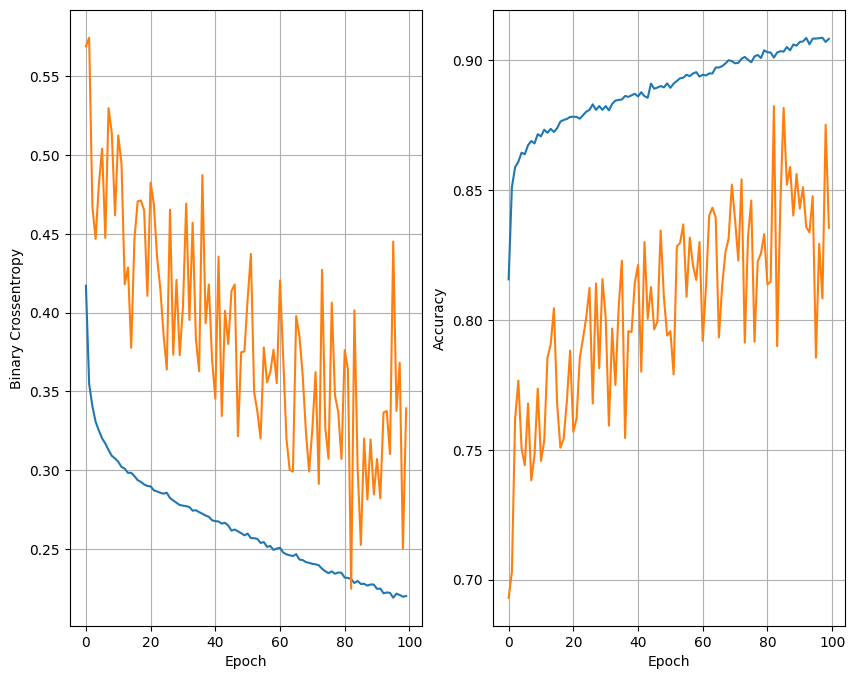

In [42]:
plot_history(history)

In [43]:
history = nn_model.fit(
    X_train, Y_train, epochs = 100, batch_size = 32, validation_split = 0.2, verbose = 0
)

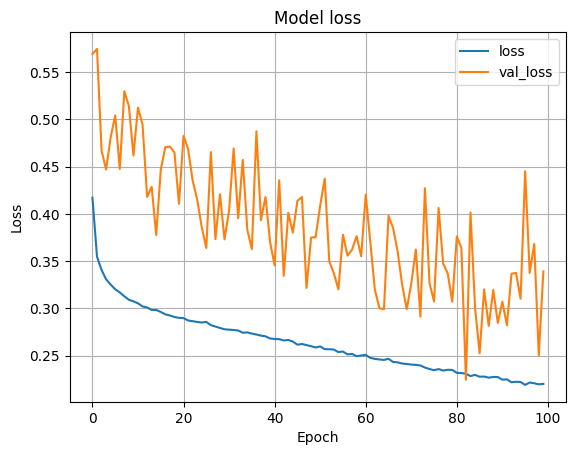

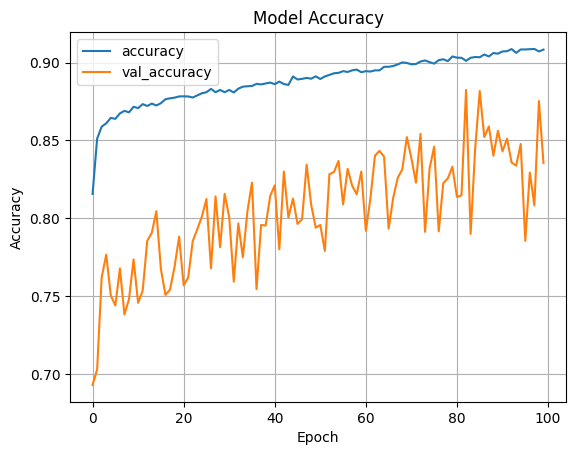

In [29]:
plot_loss(history)
plot_accuracy(history)

In [53]:
Y_pred = least_loss_model.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 4ms/step


In [54]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1309
           1       0.87      0.96      0.91      2495

    accuracy                           0.88      3804
   macro avg       0.88      0.84      0.86      3804
weighted avg       0.88      0.88      0.87      3804



# Linear Regression